## House Price Prediction
- https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr

<h3> <strong>데이터 살펴보기</strong> </h3>

아래의 그림처럼 `Data` 탭을 눌러서 우리가 사용해야 할 데이터에 대해 알아 봅시다.

`Data` 탭을 클릭하면 데이터에 대한 정보를 확인할 수 있습니다. 각 컬럼 중 3번에 해당하는 `price`가 우리가 예측해야 하는 집 값임을 알 수 있습니다.

`Data` 탭의 아래쪽에는 실제로 데이터를 살펴볼 수있는 `Data Explorer`가 존재합니다.

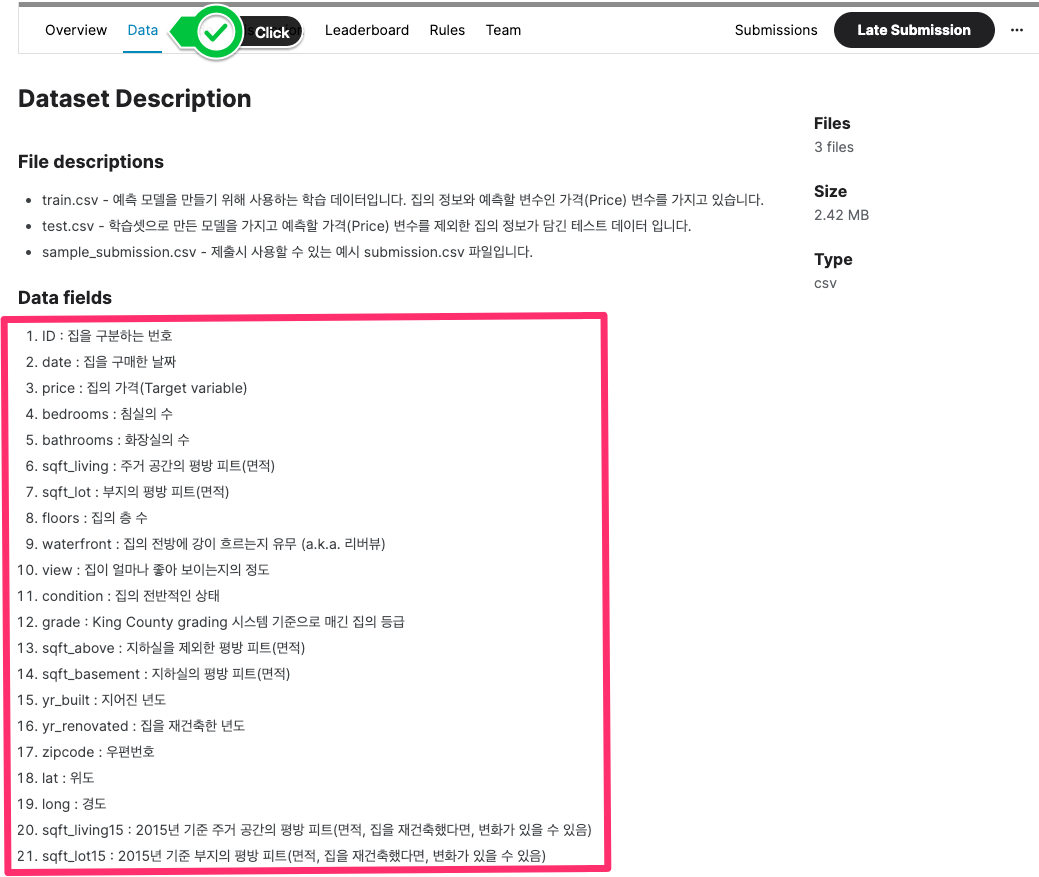

아래의 그림처럼 Data Explorer를 열어서 데이터의 분포를 살펴볼 수 있습니다.

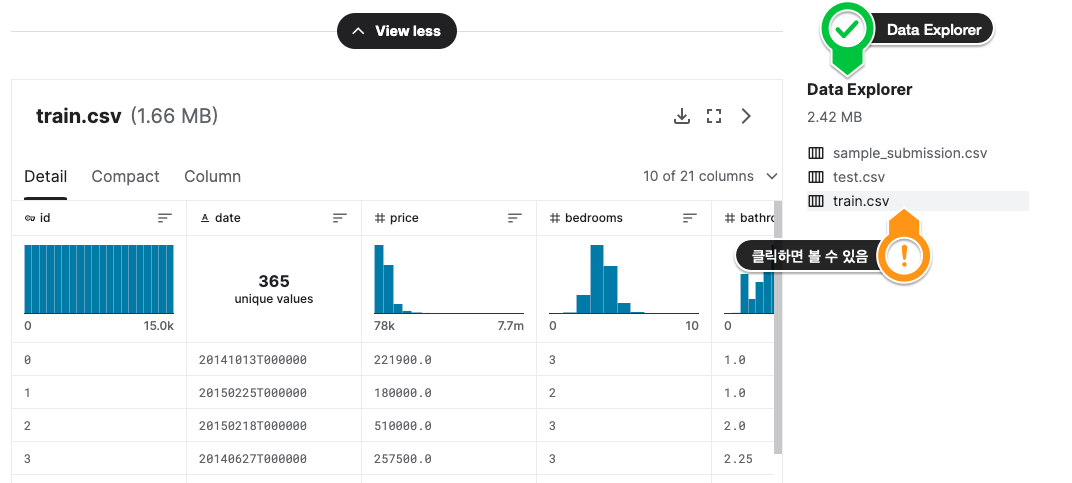

- `train.csv`라는 모델 학습용 파일과, `test.csv`라는 테스트용 파일, 그리고 `sample_submission.csv`라는 제출용 파일이 제공되고 있음을 확인할 수 있습니다.
- `train.csv`를 활용해서 데이터를 뜯어보고 모델을 학습시킨 후, `test.csv` 파일의 데이터에 대해 `price`를 예측해서 `sample_submission.csv`의 형식에 맞게 저장해봅니다.

<div class="markdown-google-sans">

## 1.기계학습 데이터 준비하기
</div>

필요한 라이브러리를 임포트(import)해보겠습니다.


### 1.1 라이브러리 가져오기

In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 1.2.데이터 가져오기

In [ ]:
# 데이터 다운로드
# !wget –no-check-certificate 'https://docs.google.com/uc?export=download&id=1IVvuG3SMlarSSGmcliGFjq1fMxZtksE0' -O kaggle-kakr-housing-data.zip

이제 아래의 명령어를 이용하여 다운로드 받은 데이터의 압축을 풀겠습니다.

In [ ]:
# 다운로드 받은 zip파일 압축풀기
#!unzip -qq ./kaggle-kakr-housing-data.zip

압축이 풀리면 다시한번 위에 그림과 같이 폴더 새로고침을 클릭해보세요. 그 곳엔 `data`란 폴더가 있고 폴더안에는 다음의 3개의 파일이 있음을 확인하실 수 있습니다.
- `train.csv` : 학습에 사용할 파일
- `test.csv` : 테스트에 사용할 파일
- `sample_submission.csv` : 캐글 대회에 제출할 파일 형식

### 1.3 데이터 살펴보기
이제 데이터를 살펴볼 시간입니다. [원본 데이터를 설명하는 곳](https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html)에서 그 정보를 가져왔습니다. 아래에 정리하였습니다.

1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. **price : 타겟 변수인 집의 가격**
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 근처 15 가구의 주거 공간, 평방 피트
21. sqft_lot15 : 근처 15가구의 부지, 평방 피트



여기서 `3. price`을 제외한 데이터를 이용하여 `3. price` 값을 예측하는 모델을 만들어야 합니다. 먼저 학습데이터와 테스트 데이터를 로드하여 데이터의 형태를 살펴보도록 하겠습니다.



In [4]:
train_data_path = './data/housing_data/train.csv'
test_data_path = './data/housing_data/test.csv'

data = pd.read_csv(train_data_path)
sub = pd.read_csv(test_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))


train data dim : (15035, 21)
sub data dim : (6468, 20)


학습 데이터(`data`)는 약 1만 5천개, 테스트 데이터(`sub`)는 약 6천개로 이루어져 있고 테스트 데이터(`sub`)에는 price가 빠져있어서 컬럼이 하나
적다는 것을 알 수 있습니다.

### **미션 1) 학습 데이터에서 라벨 제거하기**

학습데이터인 `data`는 테스트 데이터인 `sub`와 달리 우리가 예측해야 할 `price`란  컬럼을 하나 더 가지고 있습니다. 이제부터 학습데이터(`data`)의 `price`를 `y`라는 정답을 담는 변수로 옮기고 `data`에서는 `price`컬럼을 제거 하려고 합니다.

이를 직접 구현해 보세요.



```
[힌트]
- 파이썬의 del 명령어를 사용하여 특정컬럼을 지울 수 있습니다
- pandas.DataFrame.drop도 활용할 수 있습니다

```



In [ ]:
# data의 price를 y로 옮기기
y = data['price']

####################
### 미션 코드 1 ####
####################
# 미션 1 코드 작성 : data에서 price 컬럼을 완전히 삭제하기

...          # '...' 을 코드로 채워주세요


위 코드 실행 후 아래의 `data.colums`를 출력하였을 때 Index에 'price'가 없어야 합니다.

In [ ]:
print(data.columns)

모델을 학습시키기 전에 학습데이터와 테스트 데이터를 합쳐서 전체 데이터가 어떤 특성을 보이고 있는지 살펴보려고 합니다. 특성을 살펴보고 난 후엔 다시 분리하여 학습을 진행할것 입니다.
이를위해 학습데이터(`data`)의 개수를 저장하여 합쳐진 데이터에서 분리할 것 입니다.
아래의 코드는 이를 실행합니다.



In [ ]:
train_len = len(data) # 학습데이터의 수
data = pd.concat((data, sub), axis=0) # 학습데이터와 테스트 데이터 합치기

print(len(data)) # 합쳐진 데이터의 수
data.head() # 데이터 확인

`data`를 확인해보면 `data`와 `sub`가 잘 합쳐진 것을 확인하실 수 있을 겁니다.
이제부터 데이터에 결측치가 있는지 확인해보겠습니다.

**Pandas의 info 함수로 데이터 타입 및 null 체크해보기**

우리가 배웠던 `info()`함수로 데이터 타입 및 null 체크를 해보겠습니다.

In [ ]:
data.info()

### **미션 2-1) 결측치 데이터의 비율 계산해보기**

위 `info`함수를 이용하면 각 컬럼에 null 데이터가 몇개 존재하는지 확인할 수있습니다. 미션에서는 유사한 방법으로 `isna()`로 결측치 데이터를 확인하고 그 수를 `sum()`함수로 세어보겠습니다.

- 참고 : [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html)와 [`sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [ ]:
###########################
### 미션 코드작성 2 #####
###########################
# data에 isna와 sum을 적용하여 각 컬럼의 결측 치 수를 확인해 보세요.
# 여기에 코드를 작성해 보세요.
missing = ...          # '...' 을 코드로 채워주세요
print(missing)

이제 missing을 전체 데이터의 수로 나눈다면 컬럼별 결측치 데이터의 비율을 알 수 있게 됩니다.

In [ ]:
missing/data.shape[0]

**Pands describe() 함수로 수치형 데이터 기본 통계량 확인**

`describe()`함수를 이용하면 수치형 데이터의 기본적인 통계량을 확인해볼 수 있습니다. 이를 활용해 봅니다.

In [ ]:
data.describe()

<div class="markdown-google-sans">

### `missingno` 라이브러리로 결측치 데이터 시각화 하기
</div>


결측치 데이터를 시각화하면 결측치를 어떻게 처리할지 통찰을 얻을 수도 있습니다. 이를 위해서 `missingno` 라이브러리의 [`matrix`](https://github.com/ResidentMario/missingno#matrix) 함수를 이용할 수 있습니다.

`data`를 `missingno` 라이브러리를 활용하여 시각화해보세요. 아래의 코드를 채워주세요.

In [ ]:
import missingno as msno # 라이브러리 임포트
# data에 결손치를 missingno 라이브러리를 이용하여 시각화 해보세요.
msno.matrix(data)
plt.show()

msno를 활용하여 시각화하면, 미션 2에서 계산한 것처럼 결손치 데이터가 없기 때문에 까맣게 나왔을 겁니다. 시각화를 통해 결손치를 발생 시키는 원인이 어떤 컬럼으로부터 기인했는지 유추해 볼 수 있고 적절한 결손치 처리 방법에 대한 아이디어를 얻을 수 있습니다.

### 1.4 데이터 전처리하기

#### id, date 변수 정리하기


- **id컬럼 제거하기**

우리의 목표는 `price`를 예측하는 것이기 때문에 필요없는 `id`를 제거하겠습니다. 그전에 제출할때 대비하여 `sub_id` 변수에 `id` 컬럼을 저장해 두고 지우겠습니다.

In [ ]:
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

- **date 컬럼 자르기**

date 컬럼의 값을 보면 다음과 같은 형식으로 되어있는 것을 확인할 수 있습니다.
- 예시 : `20141013T000000`

우리는 연/월 데이터만 사용하기 위해 `201410` 까지 자르기 변환을 수행할 것 입니다. 이를 위해서 아래의 코드를 실행합니다.

In [ ]:
data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(int)
data.head()

#### 각 변수들의 분포 확인 및 변환하기

전체 데이터들의 분포를 확인합니다.
특히 너무 치우친 분포를 가지는 컬럼의 경우 모델이 결과를 예측하는 데에 좋지 않은 영향을 미치므로 다듬는 작업을 합니다.

아래 시각화 코드는 id 컬럼과 date컬럼을 제외한 18개 컬럼에 대해 한 번에 모든 그래프의 분포를 그려주는 코드입니다.
9행 2열의 subplot에 그래프를 그리기 위해 2중 for문을 사용합니다.

그래프의 종류는 [sns.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)을 사용합니다.
kdeplot은 이산(discrete) 데이터의 경우에도 부드러운 곡선으로 전체 분포를 확인할 수 있도록 하는 시각화 함수입니다.


In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요.

# date 변수(count==0인 경우)는 제외하고 분포를 확인
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :   # count == len(columns)
            break

위 그래프 중에서는 `bedrooms`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, `sqft_living15`, `sqft_lot15` 변수가 한쪽으로 치우친 경향을 보입니다.

이렇게 한 쪽으로 치우친 분포의 경우에는 로그 변환(log-scaling)을 통해 데이터 분포를 정규분포에 가깝게 만들 수 있습니다.




### 미션 3) 로그변환 수행하기 (log-scaling)
아래와 같이 치우친 컬럼들을 `skew_columns` 리스트 안에 담고, 모두 [`np.log1p()`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html)를 활용해서 로그 변환을 해주도록 하겠습니다. `numpy.log1p()`함수는 입력배열의 각 요소에 대해 자연로그 log(1+x)을 반환해 주는 함수 입니다.

In [ ]:
###########################
### 미션 코드작성 3 #######
###########################
# 치우친 분포의 컬럼을 저장해 두기
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = ...          # ...에 코드를 채워주세요.



log(1+x)변환을 완료하셨나요? 취우쳐 있던 `skew_colums`만을 다시 `sns.kdeplot`으로 출력해보도록 하겠습니다. 이전 출력보다 치우침이 줄어드는것이 확인 되었다면 미션 3을 잘 구현하신것 입니다.


In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

그렇다면 왜 로그 변환은 분포의 치우침을 줄어들게 만드는 걸까요?
이는 로그 함수의 형태를 보면 알 수 있습니다. 아래의 일반적인 로그 함수를 살펴봅시다.

In [ ]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

위와 같은 로그 함수의 특징은 다음과 같습니다.

- 0<x<1 범위에서는 기울기가 매우 가파릅니다. 즉, x의 구간은 (0,1)로 매우 짧은 반면, y의 구간은 (−∞,0)으로 매우 큽니다.
- 따라서 0에 가깝게 모여있는 값들이 x로 입력되면, 그 함수값인 y 값들은 매우 큰 범위로 벌어지게 됩니다. 즉, 로그 함수는 0에 가까운 값들이 조밀하게 모여있는 입력값을, 넓은 범위로 펼칠 수 있는 특징을 가집니다.
- 반면, x값이 점점 커짐에 따라 로그 함수의 기울기는 급격히 작아집니다. 이는 곧 큰 x값들에 대해서는 y값이 크게 차이나지 않게 된다는 뜻이고, 따라서 넓은 범위를 가지는 x를 비교적 작은 y값의 구간 내에 모이게 하는 특징을 가집니다.


위와 같은 특성 때문에 한 쪽으로 몰려있는 분포에 로그 변환을 취하게 되면 넓게 퍼질 수 있는 것이죠.

왜 한쪽으로 치우친 분포를 로그 변환을 취하게 되면 정규분포 모양으로 고르게 분포하게 될 수 있는지 이해가 되시나요?

그렇다면 우리가 맞추어야 할 타겟인 집의 가격, 즉 `data[price]`의 분포를 로그 변환했을 때 결과를 유추해봅시다.
원래 price의 분포는 다음과 같습니다.

In [ ]:
sns.kdeplot(y) # y는 미션 1에서 price를 저장하고 있음.
plt.show()

직접 확인해봅시다!

In [ ]:
y_log_transformation = np.log1p(y) # 미션3의 힌트가 되겠네요 ^^

sns.kdeplot(y_log_transformation)
plt.show()

확실히 아름다운 정규분포의 모양으로 가까워진 것으로 보입니다!



### 1.5 학습데이터와 테스트 데이터 분리하기

여기까지 로그 변환이 필요한 데이터에 대해 처리를 마무리하였으니, 아래와 같이 전체 데이터를 다시 나누어 줍니다.

위에서 저장해두었던 `train_len`을 인덱스로 활용해서 `:train_len`까지는 학습 데이터, 즉 `x`에 저장하고, `train_len:` 부터는 실제로 추론을 해야 하는 테스트 데이터, 즉 `sub` 변수에 저장합니다.

In [ ]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

### **[데이터전처리 통합코드]**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#--------------------------------------------------------------------------------------------------------------------------------------

train_data_path = join('./data/train.csv')
sub_data_path = join('./data/test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

#--------------------------------------------------------------------------------------------------------------------------------------
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)

#--------------------------------------------------------------------------------------------------------------------------------------
y = data['price']
del data['price']

train_len = len(data)
data = pd.concat((data, sub), axis=0)

sub_id = data['id'][train_len:]
del data['id']

data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(int)

#--------------------------------------------------------------------------------------------------------------------------------------
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

#--------------------------------------------------------------------------------------------------------------------------------------
y_log_transformation = np.log1p(y)

sub = data.iloc[train_len:, :] # 테스트 데이터
x = data.iloc[:train_len, :] # 학습데이터

print(x.shape)
print(sub.shape)

## 2.모델 구현하기

<div class="markdown-google-sans">

### <strong> 앙상블 학습 </strong>
</div>

> https://leehah0908.tistory.com/17

이제 본격적으로 학습시킬 모델을 준비합니다. 우리는 여러 가지 모델을 함께 사용해서 결과를 섞는, 블렌딩(blending) 이라는 기법을 활용합니다.

앙상블 기법이란 하나의 개별 모델을 사용하는 것이 아니라 다양한 여러 모델을 종합하여 결과를 얻는 기법입니다.

앙상블 학습 자료 참조 : [Part 1. Introduction to Ensemble Learning](https://subinium.github.io/introduction-to-ensemble-1/#:~:text=%EC%95%99%EC%83%81%EB%B8%94(Ensemble)%20%ED%95%99%EC%8A%B5%EC%9D%80%20%EC%97%AC%EB%9F%AC,%EB%A5%BC%20%EA%B0%80%EC%A7%80%EA%B3%A0%20%EC%9D%B4%ED%95%B4%ED%95%98%EB%A9%B4%20%EC%A2%8B%EC%8A%B5%EB%8B%88%EB%8B%A4.)

앙상블은 강력한 개별 모델 하나보다 약한 여러 개의 모델의 결과를 합치는 것이 낫다는 기본 전제로부터 시작됩니다.

우리는 이번에 회귀 문제를 풀고 있으므로, 위 분류기의 앙상블처럼 투표로 정하는 대신 예측 결과를 평균 내어 활용할 예정입니다.


### Averaging
부스팅 계열의 `gboost`, `xgboost`, `lightgbm`을 산술평균하는 앙상블 모델을 만들어볼 겁니다. 코드는 아래와 같습니다.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import r2_score

In [ ]:
gboost = GradientBoostingRegressor(random_state=2023)
xgboost = xgb.XGBRegressor(random_state=2023)
lightgbm = lgb.LGBMRegressor(random_state=2023)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

**Cross Validation**

먼저 교차 검증을 통해 모델의 성능을 측정하는 함수를 만들어 보겠습니다.

In [ ]:
def get_cv_score(models, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=2023)
    for m in models:
        fold_scores = []
        for train_idx, val_idx in kfold.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            model = m['model']
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            fold_scores.append(r2_score(y_val, y_pred))

        mean_score = np.mean(fold_scores)
        print(f"Model: {m['name']}, CV score: {mean_score:.4f}")

이제 `get_cv_score`함수에 우리의 모델을 넣고 테스트 해보겠습니다.

In [ ]:
X_np = x.values  # Ensure X is in NumPy format
y_np = y.values
get_cv_score(models, X_np, y_np)

`cross_val_score()` 함수는 회귀모델을 전달할 경우 $R^2$ 점수를 반환합니다. $R^2$ 값은 1에 가까울수록 모델이 잘 학습되었다는 것을 나타냅니다. 결정계수 $R^2$ 값에 대한 간단한 설명은 [결정계수 $R^2$](https://newsight.tistory.com/259) 글을 참고하세요.


우리가 참가한 캐글대회에서 제공하는 Baseline 모델에서는 다음과 같이 여러 모델을 입력하면 각 모델에 대한 예측 결과를 평균 내어주는 `AveragingBlending()` 함수를 만들어 사용합니다.

`AveragingBlending()` 함수는 models 딕셔너리 안에 있는 모델을 모두 `x`와 `y`로 학습시킨 뒤 `predictions`에 그 예측 결
과값을 모아서 평균한 값을 반환합니다.

In [ ]:
def AveragingBlending(models, x, y, sub_x):
    # 모델학습
    for m in models :
        m['model'].fit(x.values, y)

    # 모델예측
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])

    # 각 모델 예측의 평균을 return
    return np.mean(predictions, axis=1)

이제 우리의 모델에 데이터를 넣고 결과를 확인해 보겠습니다.

In [ ]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

적당한 실수값들로 예측을 해낸 것 같습니다. 그렇다면 우리는 이 결과를 캐글에 제출하기 위해 어떻게 해야 할까요?

제출해야 하는 csv 파일의 샘플이 바로 `data` 폴더에 있는 `sample_submission.csv` 입니다.
다음 코드로 `sample_submission.csv` 파일을 확인해보겠습니다.

In [ ]:
submission = pd.read_csv('./data/sample_submission.csv')
submission.head()

제출 파일은 `id`와 `price` 두 가지 열로 구성되어 있습니다. 그렇다면 우리도 `id`와 `price`로 구성된 데이터 프레임을 만들어 주도록 하겠습니다.

In [ ]:
result = pd.DataFrame({
    'id' : sub_id,
    'price' : y_pred
})

result.head()

<div class="markdown-google-sans">

### 미션 4) 모델 예측결과를 csv로 만들기
</div>
이제 완전히 준비가 끝났습니다. 이때 활용할 수 있는 함수는 [`to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)함수 입니다.
샘플 형태인 `sample_submission.csv`를 로드했을 때와 동일한 형식으로 저장해야만 정확하게 제출될 것 입니다.

In [ ]:
# 저장핦 파일명은 submission.csv로 하였습니다.
my_submission_path = './data/submission.csv'

###################
###  미션 4 코드 ####
###################
# result를 'my_submission_path'란 이름의 csv로 저장해 주세요.
... # '...' 에 코드 작성

## **3.더 좋은 성능의 모델 만들기**

이제부터는 제공된 베이스라인 모델이 아닌 우리 스스로 모델을 만들어 보도록 하겠습니다. 일단 베이스라인에서 모델학습을 진행하였고 전처리도 진행하였기 때문에 이는 그대로 가보려고 합니다.

`price`인 `y`는 지난번 살펴본 것처럼 그 분포가 왼쪽으로 크게 치우져 있었기 때문에 [`np.log1p()`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html) 함수를 이용하여 로그변환을 해주고 모델 에측이 끝났을 때 그 역함수인 [`np.expm1()`](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html)을 이용하여 돌려 놓겠습니다.

In [ ]:
train = x # 기존 학습 데이터를 train으로
test = sub # 기존 테스트 데이터를 test로
y = np.log1p(y) # y값(price)의 로그변환

### RMSE 계산함수 만들기
RMSE를 계산하는 함수를 만들어 보겠습니다. `sklearn` 패키지를 활용할 것 입니다. 먼저 [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)과 [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)를 가져옵니다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

한 가지 주의해야 할 것은 아래의 `y_test`나 `y_pred`는 위에서 `np.log1p()`로 변환된 값이기 때문에 원래 데이터의 단위에 맞게 되돌리기 위해 `np.expm1()`을 추가해야 한다는 점 입니다.
따라서 RMSE를 구하는 함수는 다음과 같습니다.

In [ ]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

다음으로 `XGBRegressor`, `LGBMRegressor`,`GradientBoostingRegressor`, `RandomForestRegressor` 네 가지 모델을 가져오겠습니다.

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

아래와 같이 모델 인스턴스를 생성한 후 models라는 리스트에 넣어줍니다.

In [ ]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다.
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.
random_state=2023        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다.

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

이때, 모델 파라미터 초기화나 데이터셋 구성에 사용되는 랜덤 시드값인 random_state 값을 특정 값으로 고정시키거나 지정하지 않고 None으로 세팅할 수 있습니다. random_state를 고정값으로 주면 모델과 데이터셋이 동일한 경우 머신러닝 학습결과도 항상 동일하게 재현됩니다. 하지만 이 값을 지정하지 않고 None으로 남겨 두면 모델 내부에서 랜덤 시드값을 임의로 선택하기 때문에, 결과적으로 파라미터 초기화나 데이터셋 구성 양상이 달라져서 모델과 데이터셋이 동일하더라도 머신러닝 학습결과는 학습할 때마다 달라집니다.

앞으로 우리는 베이스라인에서부터 시작해서 다양한 실험을 통해 성능이 개선되는지를 검증해 보려고 합니다. 이때, 어떤 시도가 모델 성능 향상에 긍정적이었는지 여부를 판단하기 위해서는 랜덤적 요소의 변화 때문에 생기는 불확실성을 제거해야 합니다. 따라서 아래와 같이 random_state 값을 특정 값으로 고정시킬 것입니다.

<div class="markdown-google-sans">

### 스코어를 출력하는 함수 만들기
</div>

아래의 코드는 위에서 만들어둔 모델을 순환하면서 그 결과를 `score_df`라는 DataFrame으로 반환하는 함수입니다. `get_score`함수이고 함수 파라미터로 다음을 받습니다.

`def get_scores(models, train, y)`
- `models` : model을 가지고 있는 list
- `train` : 학습 데이터 (함수 내부에서 validation 데이터로도 나뉨)
- `y` : 학습할 때 사용할 정답 레이블 데이터


In [ ]:
def get_scores(models, train, y):
    df = {} # 결과 저장을 위한 table 생성
    for model in models: # 모델명 추출
        model_name = model.__class__.__name__
        # 0.2만 validation에 사용
        X_train, X_val, y_train, y_val = train_test_split(train, y, random_state=random_state, test_size=0.2)

        # 모델학습
        model.fit(X_train, y_train)

        #학습된 모델 테스트
        y_pred = model.predict(X_val)

        # rmse를 이용한 계산
        df[model_name] = rmse(y_val, y_pred)

        # 테이블을 DataFrame으로 변환
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    return score_df

이제 우리가 RMSE로 결과를 만들어주는 함수가 준비되었으니 다양한 하이퍼 파라미터로 실험하는 일만 남았습니다.

실험은 `sklearn.model_selection` 라이브러리 안에 있는 `GridSearchCV` 클래스를 활용합니다.
다음 함수를 import 해주세요!

In [ ]:
from sklearn.model_selection import GridSearchCV

`GridSearchCV`란 무엇일까요?

우선 그리드 탐색과 랜덤 탐색을 알아볼 필요가 있습니다. 두 가지 모두 하이퍼 파라미터를 조합해 보는 방법입니다.

그리드 탐색은 사람이 먼저 탐색할 하이퍼 파라미터의 값들을 정해두고, 그 값들로 만들어질 수 있는 모든 조합을 탐색합니다. 특정 값에 대한 하이퍼 파라미터 조합을 모두 탐색하고자 할 때 유리하겠네요!

랜덤 탐색은 사람이 탐색할 하이퍼 파라미터의 공간만 정해두고, 그 안에서 랜덤으로 조합을 선택해서 탐색하는 방법입니다.

그리드 탐색에서는 사람이 정해둔 값들로 이루어지는 조합만 탐색하기 때문에 최적의 조합을 놓칠 수 있는 반면, 랜덤 탐색에서는 말 그대로 랜덤으로 탐색하기 때문에 최적의 조합을 찾을 수 있는 가능성이 언제나 열려 있습니다. 하지만 그 가능성 또한 랜덤성에 의존하기 때문에 언제나 최적을 찾는다는 보장은 없어요.

다음 이미지가 그리드 탐색(grid search)과 랜덤 탐색(random search) 두 가지를 잘 나타내고 있습니다.
그리드 탐색은 정해진 하이퍼 파라미터의 조합을 격자와 같이 탐색하는 반면, 랜덤 탐색은 랜덤으로 점을 찍어서 탐색합니다.

확실히 그리드 탐색의 탐색 공간은 매우 제한적인 반면 랜덤 탐색은 탐색하는 공간이 훨씬 넓습니다

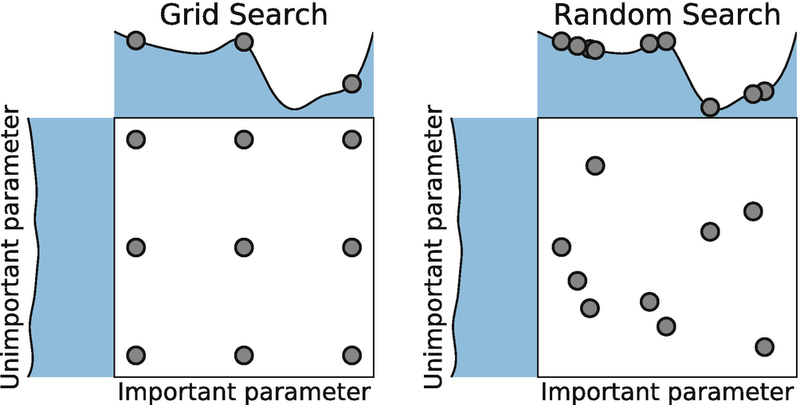

> 그림설명 : [Bergstra, J., Bengio, Y.: Random search for hyper-parameter optimization. Journal of Machine Learning Research 13, 281–305 (2012), 다음의 블로그에서 재인용]

우리는 앞서 언급했듯 다양한 파라미터를 입력하면 가능한 모든 조합을 탐색하는 사이킷런의 `GridSearchCV`를 활용해 볼 것입니다.

먼저 `GridSearchCV`에 입력되는 인자들은 다음과 같습니다.

- `param_grid` : 탐색할 파라미터의 종류 (딕셔너리로 입력)
- `scoring` : 모델의 성능을 평가할 지표
- `cv` : cross validation을 수행하기 위해 train 데이터셋을 나누는 조각의 개수
- `verbose` : 그리드 탐색을 진행하면서 진행 과정을 출력해서 보여줄 메세지의 양 (숫자가 클수록 더 많은 메세지를 출력합니다.)
- `n_jobs` : 그리드 탐색을 진행하면서 사용할 CPU의 개수

그러면 param_grid에 탐색할 xgboost 관련 하이퍼 파라미터를 넣어서 준비하겠습니다.

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

그다음으로 모델을 준비합니다. 모델은 LightGBM(lgbm)를 사용해봅시다.

In [ ]:
model = LGBMRegressor(random_state=random_state)

그러면 `model`, `param_grid`와 함께 다른 여러 가지 인자를 넣어서 `GridSearchCV`를 수행할 수 있습니다!

다음과 같이 `GridSearchCV`를 이용해서 `grid_model` 모델을 초기화하고, `train`과 `y` 데이터로 모델을 간단히 학습시키면 `param_grid` 내의 모든 하이퍼 파라미터의 조합에 대해 실험이 완료됩니다.

In [ ]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(x, y)

이제 `grid_model.fit` 함수를 통해서 4가지 조합에 대한 실험을 모두 마쳤습니다.

실험에 대한 결과는 다음과 같이 `grid_model.cv_results_` 안에 저장됩니다.

In [ ]:
grid_model.cv_results_

정보가 너무 많아서 눈에 잘 들어오지 않으니 원하는 값만 정제해서 확인하도록 하겠습니다.

우리가 관심 있는 정보는 어떤 파라미터 조합일 때 점수가 어떻게 나오게 되는지에 관한 것이겠죠.
파라미터 조합은 위 딕셔너리 중 `params`에, 각각에 대한 테스트 점수는 `mean_test_score`에 저장되어 있습니다.

이 두 정보만 빼내어 보겠습니다.

In [ ]:
params = grid_model.cv_results_['params']
params

In [ ]:
score = grid_model.cv_results_['mean_test_score']
score

**테이터 프레임 합쳐서 표현해 보기**

`params`에는 각 파라미터의 조합이, `score`에는 각 조합에 대한 점수가 들어가 있군요.

이제 이 둘만 가지고 데이터 프레임을 만들고 최적의 성능을 내는 하이퍼 파라미터의 조합을 찾아봅시다.

다음과 같은 형태의 데이터 프레임을 출력하는 코드를 작성해 보겠습니다.


|max_depth| n_estimators| score|
|---|---|---|
|1|50|-0.07339763|
|1|100|-0.05502319|
|10|50|-0.02917323|
|10|100|-0.02702383|

In [ ]:
results = pd.DataFrame(params)
results['score'] = score

results

자, 그런데 여기에서 한 가지 의문이 드는 것이 있습니다. 왜 점수는 음수일까요?!

그 이유는 바로 GridSearchCV을 초기화 한 코드에 힌트가 있습니다.
우리가 위에서 GridSearchCV로 grid_model 모델을 초기화할 때, scoring 인자에 무엇을 넣었는지 기억하시나요?

우리는 현재 Regression 문제를 풀고 있기 때문에 그에 알맞은 성능 평가 지표를 사용하였습니다.
우리가 사용한 것이 `neg_mean_squared_error`를 사용했기 때문에 점수가 음수로 표현되는 것이죠!

아래와 같은 간단한 변환 함수로 RMSE 점수를 볼 수 있도록 하겠습니다.
음수로 된 MSE였으니, -1을 곱해주고 np.sqrt로 루트 연산을 해주면 되겠죠.

In [ ]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

앗, 하지만 아직도 위에서 보았던 10만 단위의 RMSE와는 값의 크기가 아주 다른 것 같습니다.

그 이유는 `price`에 있습니다. 위에서 우리는 `price`의 분포가 한쪽으로 치우쳐져 있는 것을 보고 log 변환을 했었죠.
그 후 rmse 값을 계산하기 위한 함수에서는 `np.expm1` 함수를 활용해 다시 원래대로 복원한 후 RMSE 값을 계산했습니다.

하지만 그리드 탐색을 하면서는 `np.expm1()`으로 변환하는 과정이 없었기 때문에 log 변환되어 있는 `price` 데이터에서 손실함수값을 계산한 것이죠.
따라서 사실, 위의 데이터 프레임에 나타난 값은 정확히 말하면 RMSE가 아니라 RMSLE, 즉 Root Mean Squared Log Error 입니다.
log를 취한 값에서 RMSE를 구했다는 뜻이죠!

### 컬럼명 바꾸기
`RMSE` 컬럼의 이름을 RMSLE로 변환해 주도록 하겠습니다. 판다스에서 컬럼의 이름 변환은 [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)으로 할 수 있습니다. 아래에 코드를 작성하고 출력해보세요.

In [ ]:
results = results.rename(columns={'RMSE':'RMSLE'}) # '...'에 코드작성
results

### RMSLE를 낮은 순서대로 정렬하기
sort_values로 간단히 할 수 있습니다. 공식 문서를 참고해 직접 작성해 보세요.

In [ ]:
## results 데이터 프레임에서 RMSLE가 낮은 순으로 정렬하기
results = results.sort_values(by='RMSLE') # '...' 에 코드 작성
results

### 함수로 만들기
지금까지의 `GridSearchCV`를 통해 진행한 내용들을 간단히 함수로 만들어 보도록 하겠습니다.

다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.

1. GridSearchCV 모델로 `model`을 초기화합니다.
2. 모델을 fitting 합니다.
3. params, score에 각 조합에 대한 결과를 저장합니다.
4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.

In [ ]:
## 함수로 만들기

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = ... # '...' 에 코드 작성
    score = ... # '...' 에 코드 작성

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = ... # '...'에 코드 작성

    # RMSLE 값 계산
    results['RMSLE'] = ... # '...'에 코드작성

    # RMSLE 값으로 장렬
    results = ... # '...'에 코드작성

    return results

### 하이퍼 파라미터 튜닝결과 제출해보기

이제 실험에 대한 준비는 모두 끝났습니다! 실험을 통해 좋은 결과를 내는 모델을 찾았다면 제출을 해봐야겠죠.
제출 과정 또한 하나의 함수로 깔끔하게 진행하겠습니다.

먼저 여러분이 만들어놓은 `my_GridSearch()` 함수로 간단한 그리드 탐색을 해보겠습니다.

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

가장 좋은 조합은 `max_depth=10`, `n_estimators=100` 이군요.
해당 모델로 학습을 해서 예측값인 `submission.csv` 파일을 만들어서 제출해보겠습니다.

먼저 해당 파라미터로 구성된 모델을 준비하고, 학습 후 예측 결과를 생성합니다.

In [ ]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

앗, 예측 결과에 `np.expm1()`을 씌워서 다시 원래 스케일로 되돌리는 것도 잊으면 안 되겠죠!

In [ ]:
prediction = np.expm1(prediction)
prediction

샘플로 제공받은 `sample_submission.csv` 파일을 로드해보겠습니다. 거기에 덮어씌우면 되기 때문입니다.

In [ ]:
submission_path = './data/sample_submission.csv'
submission = pd.read_csv(submission_path)
submission.head()

위의 데이터프레임에 우리의 모델이 예측한 값을 덮어씌우겠습니다.

In [ ]:
submission['price'] = prediction
submission.head()

위의 데이터를 csv 파일로 저장하겠습니다.

단, 앞으로는 많은 실험이 있을 예정이니 파일 이름에 모델의 종류와 위에서 확인했던 RMSLE 값을 넣어주면 제출 파일들이 깔끔하게 관리될 것입니다!

In [ ]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format('./data', 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

위의 과정들도 하나의 함수로 정리해두면 사용하기 편리하겠죠.

In [ ]:
""
아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수.
1. 모델을 `train`, `y`로 학습시킵니다.
2. `test`에 대해 예측합니다.
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
"""

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = './data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

이 함수를 사용한다면 다음 한 줄로 모델을 학습시킨 후 예측 결과를 저장할 수 있습니다.

In [ ]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.164399')